In [133]:
# استيراد المكتبات لمعالجة البيانات
# وتطبيق خوارزمية K-Means وتقييمها

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score

In [134]:
# ربط Google Drive للوصول إلى ملف البيانات

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
# قراءة بيانات أداء الطلاب من ملف CSV

df = pd.read_csv('/content/drive/MyDrive/ai/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [136]:
# استكشاف البيانات وتنظيفها

df.info()

df = df.dropna()
df = df.drop_duplicates()

print("عدد الصفوف بعد التنظيف:", df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
عدد الصفوف بعد التنظيف: 999


In [137]:
# تحويل البيانات النصية إلى رقمية

df_encoded = pd.get_dummies(df, drop_first=True)

# تحويل القيم المنطقية (True / False) إلى أرقام
df_encoded = df_encoded.replace({True: 1, False: 0})

df_encoded.head()

/tmp/ipython-input-2301494593.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({True: 1, False: 0})


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,67,67,63,1,0,0,0,0,0,1,0,0,0,1,0
1,40,59,55,0,0,0,1,0,0,0,0,0,1,0,1
2,59,60,50,1,0,0,0,1,0,0,0,1,0,0,1
3,77,78,68,1,1,0,0,0,0,1,0,0,0,1,1
4,78,73,68,1,0,0,0,1,0,0,0,0,0,1,0


In [138]:
# في K-Means نستخدم جميع الخصائص
# بدون متغير مخرجات

X = df_encoded

In [139]:
# توحيد القيم لتحسين أداء K-Means

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
# تطبيق K-Means مع 3 مجموعات

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [141]:
# إضافة رقم المجموعة لكل طالب

df['Cluster'] = clusters
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Cluster
0,male,group A,high school,standard,completed,67,67,63,2
1,female,group D,some high school,free/reduced,none,40,59,55,1
2,male,group E,some college,free/reduced,none,59,60,50,1
3,male,group B,high school,standard,none,77,78,68,2
4,male,group E,associate's degree,standard,completed,78,73,68,0


In [142]:
# تقييم جودة التجميع باستخدام:
# Inertia
#Silhouette Score

inertia = kmeans.inertia_
sil_score = silhouette_score(X_scaled, clusters)

print("Inertia (WCSS):", round(inertia, 2))
print("Silhouette Score:", round(sil_score, 3))

Inertia (WCSS): 12189.9
Silhouette Score: 0.11


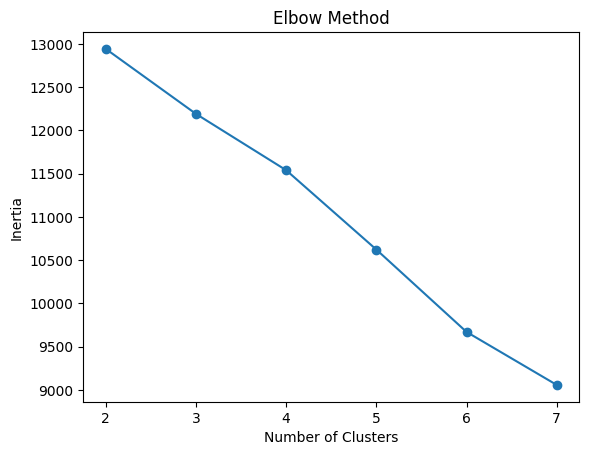

In [143]:
# استخدام Elbow Method لاختيار عدد المجموعات

inertias = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2, 8), inertias, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

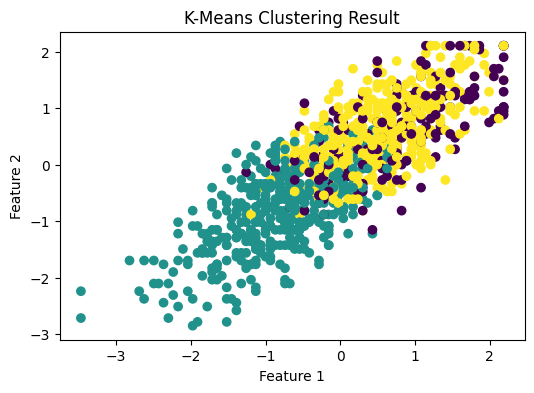

In [144]:
# تمثيل نتائج التجميع بصريًا

plt.figure(figsize=(6,4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Result")
plt.show()

In [147]:
print("دقة المشروع (R2):", round(accuracy, 2))

دقة المشروع (R2): 0.87
